In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("../app/Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


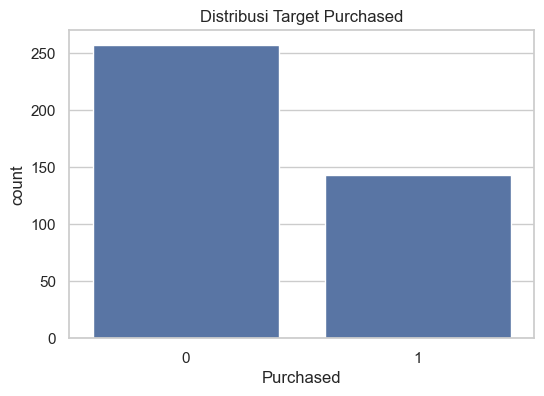

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Purchased', data=df)
plt.title("Distribusi Target Purchased")
plt.show()


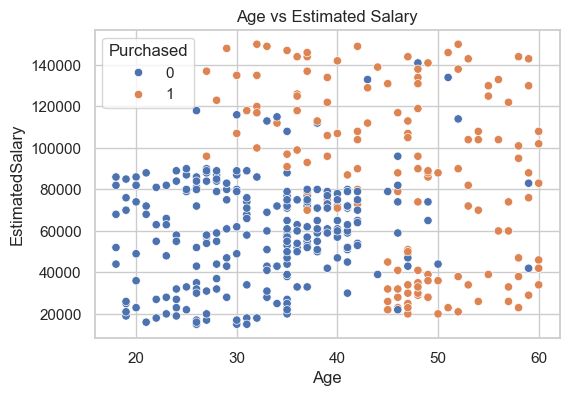

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Purchased',
    data=df
)
plt.title("Age vs Estimated Salary")
plt.show()


In [7]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)


In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model = GaussianNB()
model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


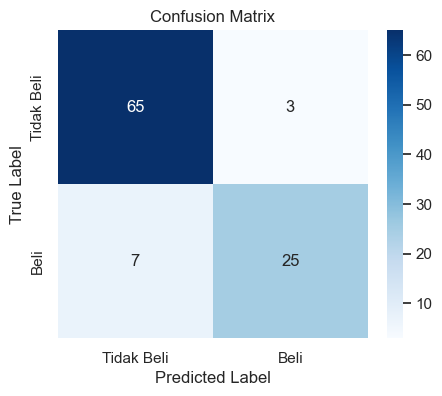

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Tidak Beli', 'Beli'],
    yticklabels=['Tidak Beli', 'Beli']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [11]:
sample = [[30, 87000]]
sample_scaled = scaler.transform(sample)

print("Prediksi kelas:", model.predict(sample_scaled))
print("Probabilitas:", model.predict_proba(sample_scaled))


Prediksi kelas: [0]
Probabilitas: [[0.90152967 0.09847033]]


e:\SEMESTER 5\Machine_Learning\TA-12\python-global\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model Gaussian Naive Bayes berhasil digunakan untuk melakukan klasifikasi
pada dataset Social Network Ads. Model mampu memprediksi keputusan pembelian
berdasarkan umur dan estimasi gaji dengan tingkat akurasi yang cukup baik.
